<a href="https://colab.research.google.com/github/DhawalKhandait/Bike-Sharing-Demand-Prediction-Regression-/blob/main/_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Seoul Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle':'--'})
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [3]:
# Load Dataset
bike_df=pd.read_csv("/content/drive/MyDrive/Regression/SeoulBikeData.csv",encoding='unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
bike_df.head(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

# computing number of rows
rows=len(bike_df.axes[0])

# computing number of columns
columns=len(bike_df.axes[1])

print("NUmber of rows : ",rows)
print("Number of columns : ",columns)

NUmber of rows :  8760
Number of columns :  14


### Dataset Information

This dataset contains the data of rented bike count in the city of seoul. It presents the count of bikes rented per hour and the weather conditions for the day. The data is of one year from December 2017 to November 2018.

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
bike_df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Above we can see there are no missing values as well as no duplicate values in the dataset.**

###**In the given dataset there are total 14 columns and most of them have 0 null values.**

### What did you know about your dataset?

In this Dataset, we have 8760 rows and 14 columns from which "rented bike count" is our target variable. There are numerical variables as well as categorical variables and one date variable which is stored as object so we will need to convert its dtype.

## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
bike_df.columns=map(str.lower, bike_df.columns)
bike_df.columns

Index(['date', 'rented bike count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind speed (m/s)', 'visibility (10m)', 'dew point temperature(°c)',
       'solar radiation (mj/m2)', 'rainfall(mm)', 'snowfall (cm)', 'seasons',
       'holiday', 'functioning day'],
      dtype='object')

In [9]:
# Dataset Describe
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       8760 non-null   object 
 1   rented bike count          8760 non-null   int64  
 2   hour                       8760 non-null   int64  
 3   temperature(°c)            8760 non-null   float64
 4   humidity(%)                8760 non-null   int64  
 5   wind speed (m/s)           8760 non-null   float64
 6   visibility (10m)           8760 non-null   int64  
 7   dew point temperature(°c)  8760 non-null   float64
 8   solar radiation (mj/m2)    8760 non-null   float64
 9   rainfall(mm)               8760 non-null   float64
 10  snowfall (cm)              8760 non-null   float64
 11  seasons                    8760 non-null   object 
 12  holiday                    8760 non-null   object 
 13  functioning day            8760 non-null   objec

### Variables Description 

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [10]:
# converting the dtype of date column
def get_date(str_date):
  date_obj= dt.datetime.strptime(str_date,'%d/%m/%Y')
  date_obj = pd.to_datetime(date_obj.date(), format="%Y-%m-%d")
  return date_obj

bike_df['date'] = bike_df['date'].apply(get_date)


In [11]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       8760 non-null   datetime64[ns]
 1   rented bike count          8760 non-null   int64         
 2   hour                       8760 non-null   int64         
 3   temperature(°c)            8760 non-null   float64       
 4   humidity(%)                8760 non-null   int64         
 5   wind speed (m/s)           8760 non-null   float64       
 6   visibility (10m)           8760 non-null   int64         
 7   dew point temperature(°c)  8760 non-null   float64       
 8   solar radiation (mj/m2)    8760 non-null   float64       
 9   rainfall(mm)               8760 non-null   float64       
 10  snowfall (cm)              8760 non-null   float64       
 11  seasons                    8760 non-null   object        
 12  holida

In [12]:
# extracting the day, month and day of the week 

bike_df['day'] = bike_df['date'].apply(lambda x : x.day)
bike_df['month'] = bike_df['date'].apply(lambda x : x.month)
bike_df['day_of_week'] = bike_df['date'].dt.day_name()

bike_df = bike_df.drop("date", axis=1)

bike_df.head()

rented bike count  hour  temperature(°c)  humidity(%)  wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   visibility (10m)  dew point temperature(°c)  solar radiation (mj/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   rainfall(mm)  snowfall (cm) seasons     holiday functioning day  day  \
0           0.0            0.0  Winter  No Holiday             Yes    1   
1           0.0            0.0  Winter  No Holiday             Yes    1   
2           0.0            0.0  Winter  No Holiday             Yes    1   
3           0.0            0.0  Winter  No Holiday             Yes    1   
4           0.0            0.0  Winter  No Holiday             Yes    1   

   month day_of_week  
0     12      Friday  
1     12      Friday  
2     12      Friday  
3     12      Friday  
4     12      Friday

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
bike_df.nunique()

rented bike count            2166
hour                           24
temperature(°c)               546
humidity(%)                    90
wind speed (m/s)               65
visibility (10m)             1789
dew point temperature(°c)     556
solar radiation (mj/m2)       345
rainfall(mm)                   61
snowfall (cm)                  51
seasons                         4
holiday                         2
functioning day                 2
day                            31
month                          12
day_of_week                     7
dtype: int64

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Univariate Analysis**

### **Dependent Variable**

First we will start with analyzing our target variable which is **rented bike count**.

#### Chart - 1

In [14]:
# Chart - 1 visualization code
dependent_var ="rented bike count"

In [15]:
bike_df[dependent_var].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: rented bike count, dtype: float64

Now let's see the distribution of dependent variables 'rented bike count'


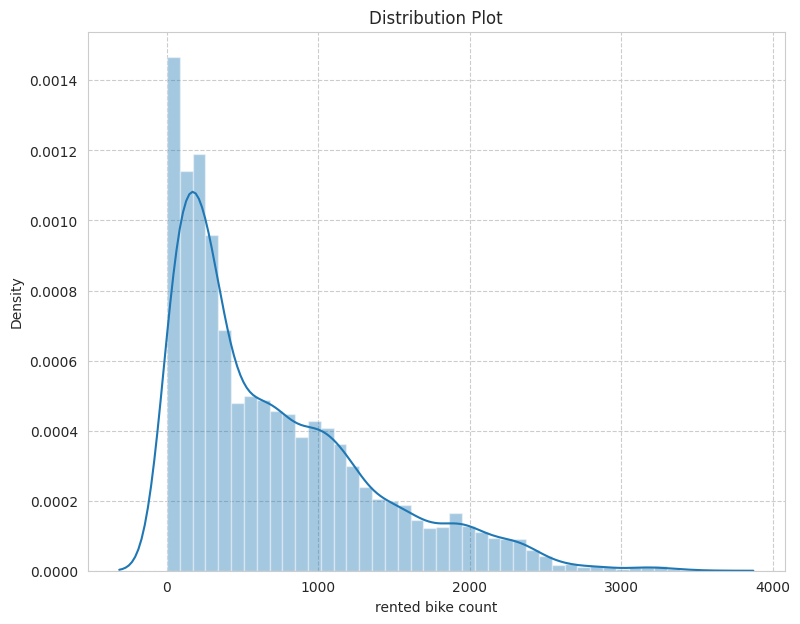

In [16]:
# distribution plot
plt.figure(figsize=(9,7))
sns.distplot(bike_df[dependent_var])
plt.title("Distribution Plot")
plt.show()

##### 1. Why did you pick the specific chart?

* Use this chart in order to get the how the Depedent variables(rented bike count) are dsitributed along the Independent features.
* Above we can see that Dependent variable is rightly skewed.

##### 2. What is/are the insight(s) found from the chart?

Dependent variable i.e rented bike count is slightly skewed towards right side (positively skewed). So we will apply transformation and again look at the distribution.

Below are some transformation technique to reduce skewness.

<b>square-root for moderate skew:</b>
sqrt(x) for positively skewed data,
sqrt(max(x+1) - x) for negatively skewed data

<b>log for greater skew:</b>
log10(x) for positively skewed data,
log10(max(x+1) - x) for negatively skewed data

<b>inverse for severe skew:</b>
1/x for positively skewed data
1/(max(x+1) - x) for negatively skewed data

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


No, the above distribution drawn doesn't create a positive impact on business. Because, the graph is highly skewed that the data is not normally distributed. 

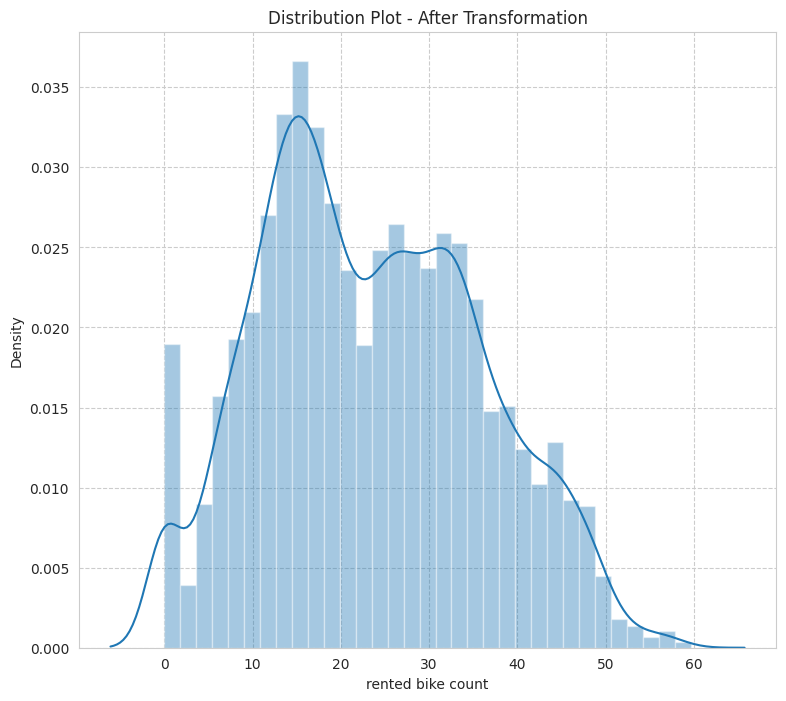

In [17]:
# Applying square-root transformation

plt.figure(figsize=(9,8))
sns.distplot(np.sqrt(bike_df[dependent_var]))
plt.title("Distribution Plot - After Transformation")
plt.show()

It looks good and almost near to the normal distribution

#### Chart - 2

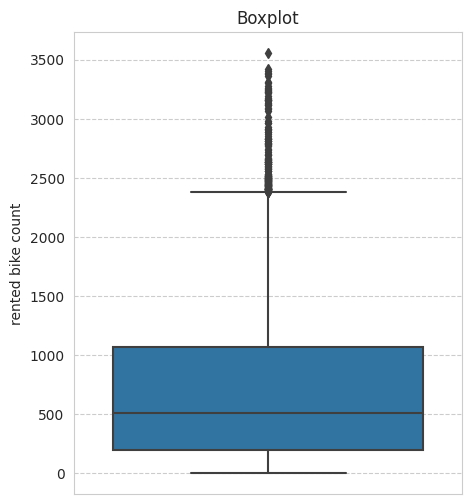

In [18]:
# Chart - 2 visualization code
# Box Plot
plt.figure(figsize=(5,6))
sns.boxplot(y=bike_df[dependent_var])
plt.title("Boxplot")
plt.show()

##### 1. Why did you pick the specific chart?

* plot the distribution plot in order to see how the dependent variable is spread and we cam to conclusion that it is positively skewed.
* From Boxplot we come to know about the outliers in the dependent variable

##### 2. What is/are the insight(s) found from the chart?

From boxplot, we can see the median value of rented bike count is near 500 and there are some outliers towards upper limit. After applying transformation there will be no outliers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No, above boxplot doesn't create positive effect, as we can see there are more number of outliers in this variable 
The above Boxplot drawn gives the idea of outliers present in the dependent variable

## **Independent Variables**

## **Numerical Variables**

Now let's have a look at the numerical features and plot some graphs to understand them

In [19]:
# numerical variables

numerical_var =list(bike_df.describe().columns[1:])
numerical_var

['hour',
 'temperature(°c)',
 'humidity(%)',
 'wind speed (m/s)',
 'visibility (10m)',
 'dew point temperature(°c)',
 'solar radiation (mj/m2)',
 'rainfall(mm)',
 'snowfall (cm)',
 'day',
 'month']

In [20]:
bike_df[numerical_var].describe().T

count         mean         std   min     25%  \
hour                       8760.0    11.500000    6.922582   0.0    5.75   
temperature(°c)            8760.0    12.882922   11.944825 -17.8    3.50   
humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
dew point temperature(°c)  8760.0     4.073813   13.060369 -30.6   -4.70   
solar radiation (mj/m2)    8760.0     0.569111    0.868746   0.0    0.00   
rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   
day                        8760.0    15.720548    8.796749   1.0    8.00   
month                      8760.0     6.526027    3.448048   1.0    4.00   

                               50%      75%      max  
hour                         11.50    17.25    23.00  
temperature(°c)              13.70    22.50    39.40  
humidity(%)                  57.00    74.00    98.00  
wind speed (m/s)              1.50     2.30     7.40  
visibility (10m)           1698.00  2000.00  2000.00  
dew point temperature(°c)     5.10    14.80    27.20  
solar radiation (mj/m2)       0.01     0.93     3.52  
rainfall(mm)                  0.00     0.00    35.00  
snowfall (cm)                 0.00     0.00     8.80  
day                          16.00    23.00    31.00  
month                         7.00    10.00    12.00

In [21]:
# Unique count of numerical variables

lst=[]
for col in numerical_var:
  lst.append(bike_df[col].nunique())

unique_cnt_df=pd.DataFrame(index=numerical_var,columns=["unique_count"])  
unique_cnt_df["unique_count"]=lst
unique_cnt_df

unique_count
hour                                 24
temperature(°c)                     546
humidity(%)                          90
wind speed (m/s)                     65
visibility (10m)                   1789
dew point temperature(°c)           556
solar radiation (mj/m2)             345
rainfall(mm)                         61
snowfall (cm)                        51
day                                  31
month                                12

#### Chart - 3

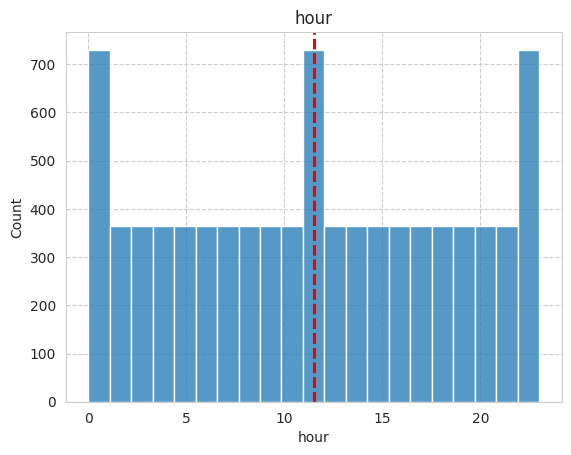

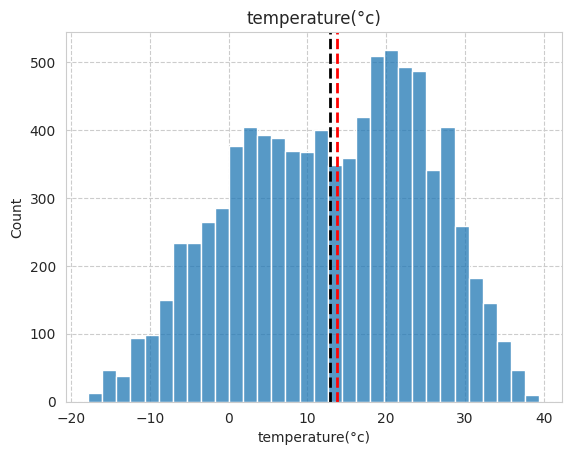

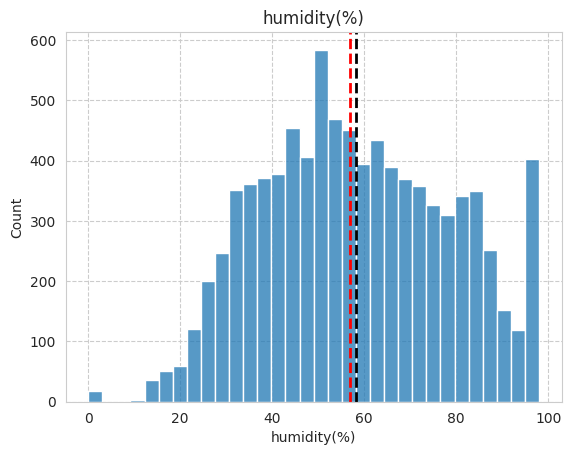

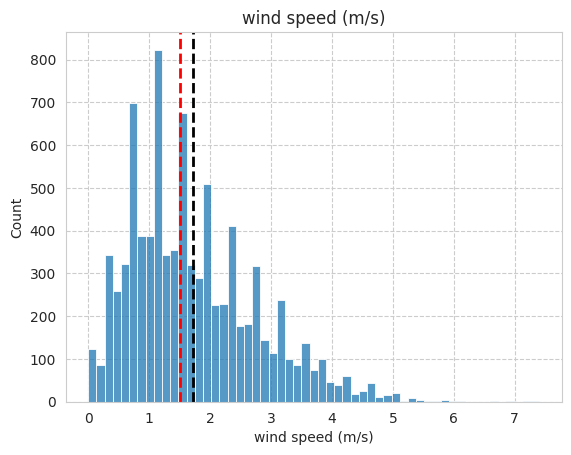

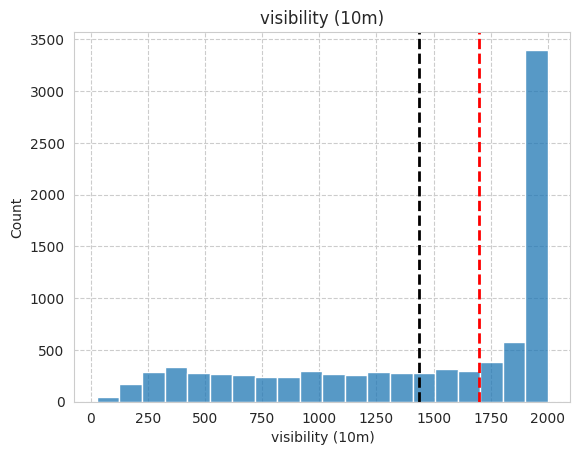

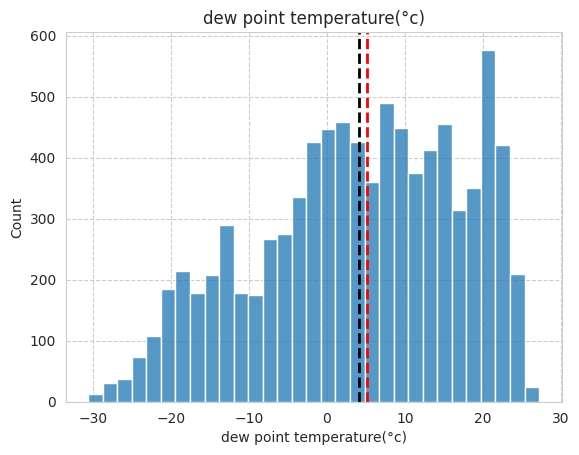

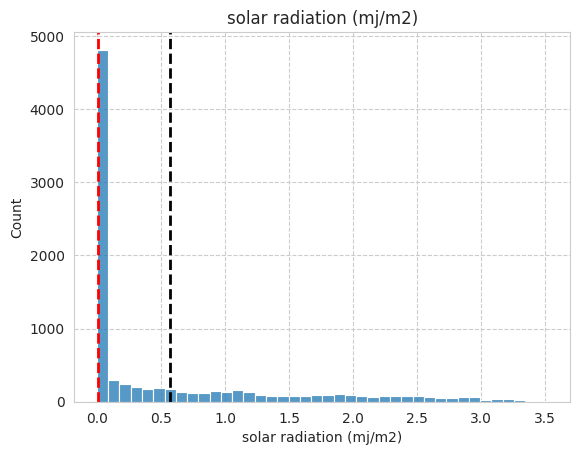

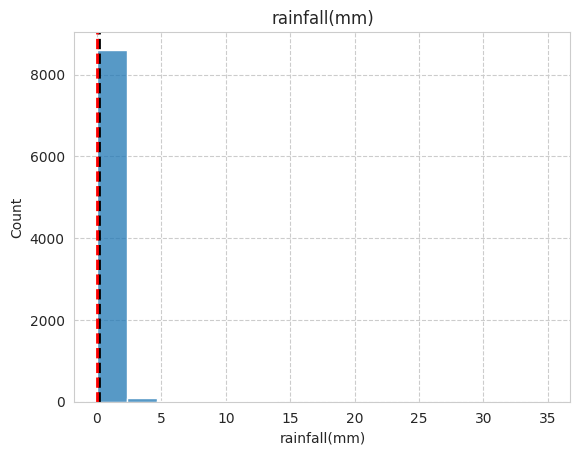

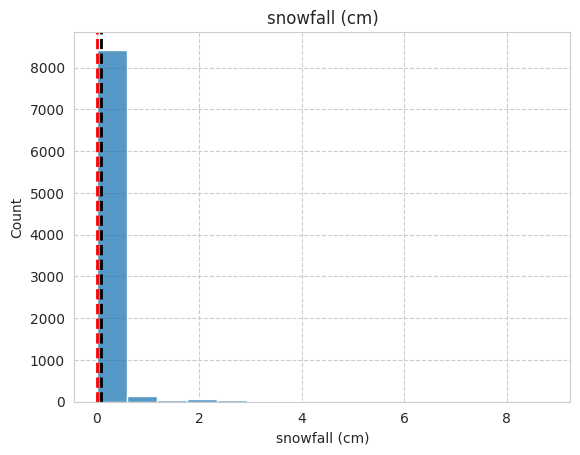

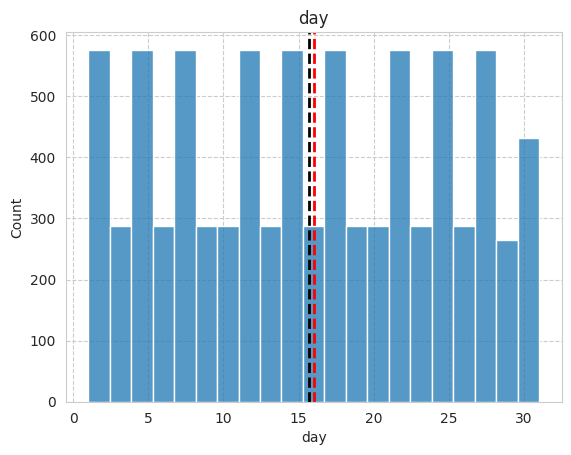

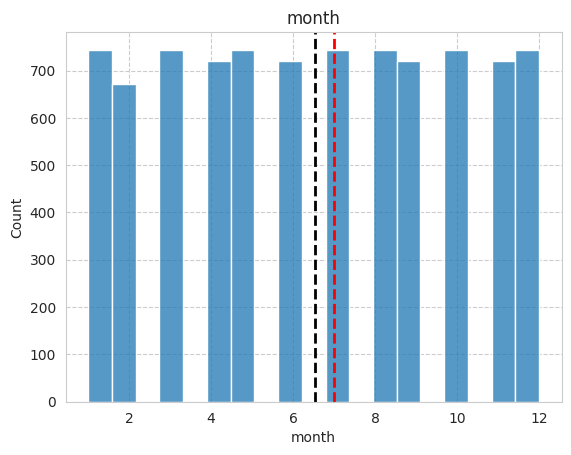

In [22]:
# Chart - 3 visualization code
for col in numerical_var:
  features = bike_df[col]
  sns.histplot(features)
  plt.axvline(features.mean(),color='black',linestyle='dashed',linewidth=2)
  plt.axvline(features.median(),color='red',linestyle='dashed',linewidth=2)
  plt.title(col)
  plt.show()

##### 1. Why did you pick the specific chart?

* In above case, Histogram plot of all the variable is plotted.
* Histogram plot shows frequency distributions.

##### 2. What is/are the insight(s) found from the chart?

* In the above case we get to know about how the numerical variables are distributed around Average line.
* Histogram is showing the frequency distribution, but average line helps to know the mean of the data for each variable

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, It will help creating a positive business impact

#### Chart - 4

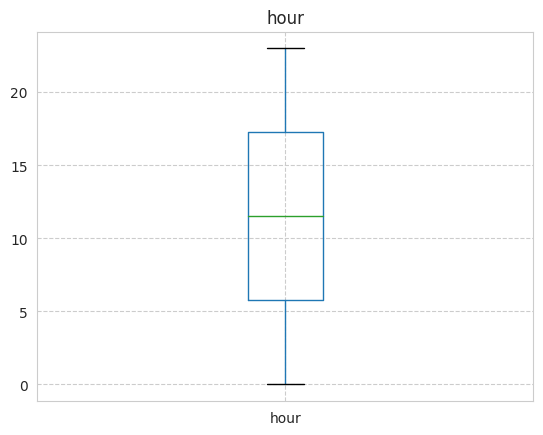

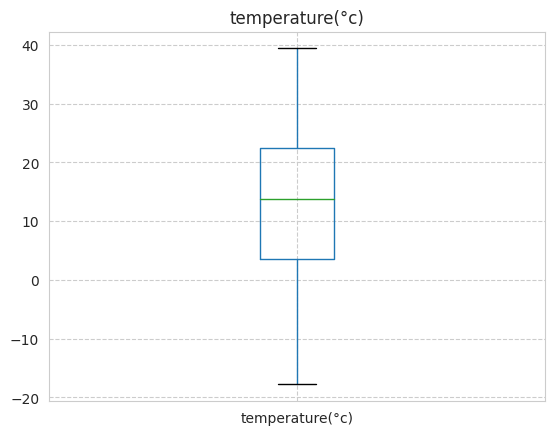

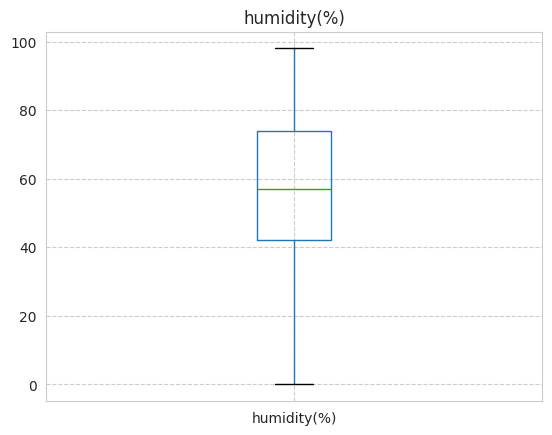

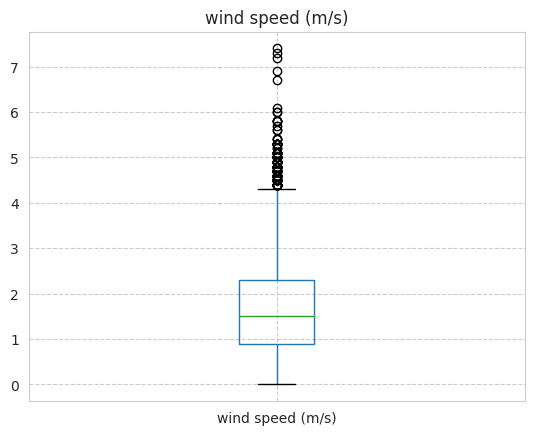

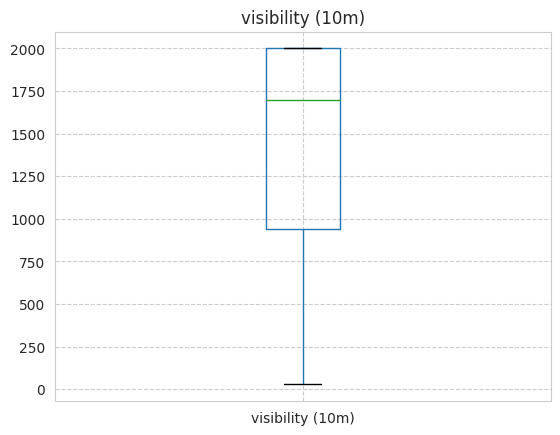

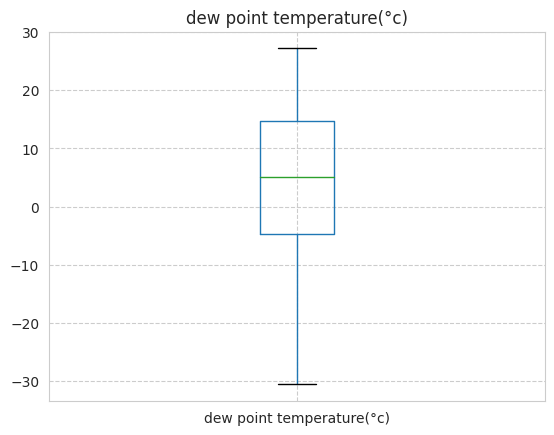

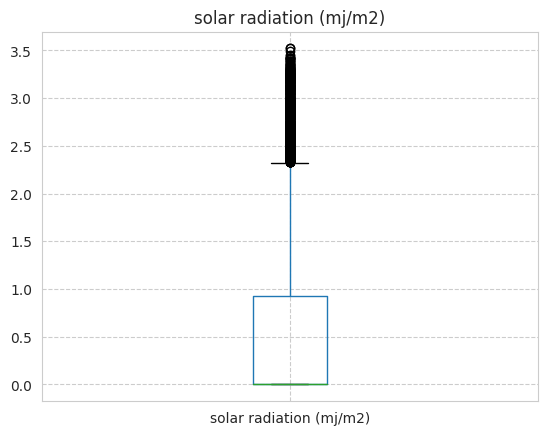

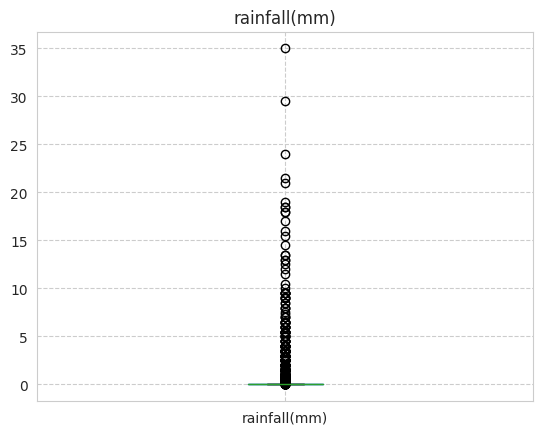

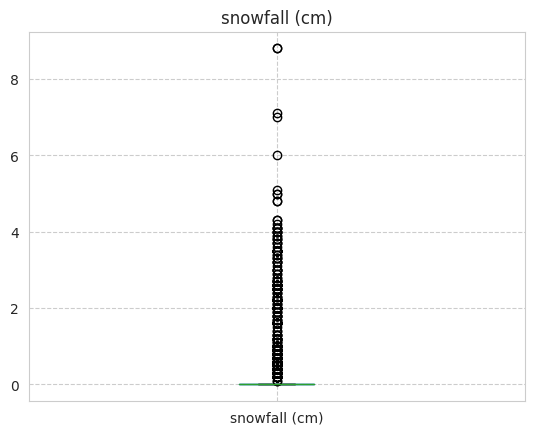

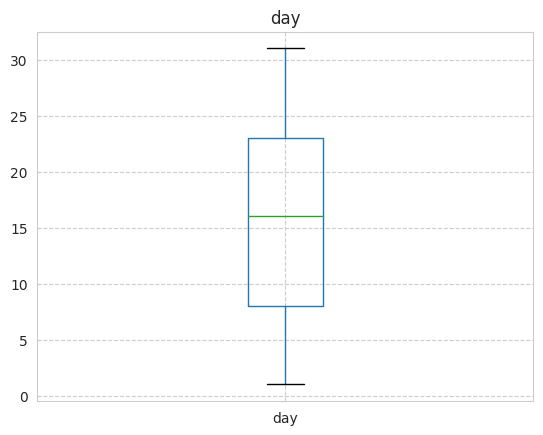

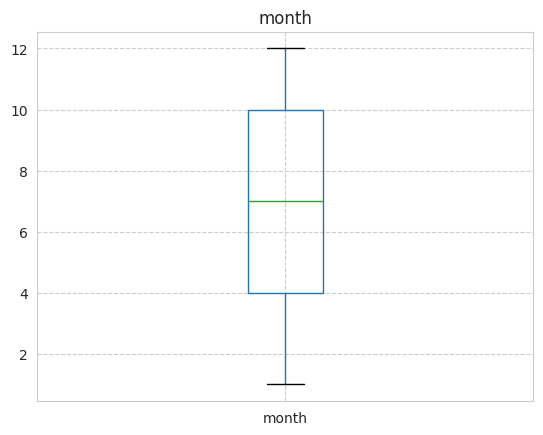

In [23]:
# Chart - 4 visualization code
# boxplot for each numerical features

for col in numerical_var:
  fig=plt.figure()
  ax=fig.gca()
  bike_df.boxplot(col,ax=ax)
  ax.set_title(col)
plt.show()  

Variables such as wind speed (m/s), solar radiation (mj/m2), rainfall(mm), snowfall (cm) has outliers as seen in the boxplot.

##### 1. Why did you pick the specific chart?

Boxplot helps detect the outliers present in the dataset or in particular feature
* Boxplot tells how the variable is afffected by outliers

##### 2. What is/are the insight(s) found from the chart?


* From above plot we can conclude that the numerical variables **Windspeed, Solar radiation, rainfall and snowfall** are affected by outliers
* whereas, the numerical vaiables **hour, temperature, humidity, visibility, dew-point, day and month** are not affected by outliers

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights helps creating positive business impact.

## **Categorical Variables**

In [24]:
categorical_var=list(bike_df.select_dtypes(include='object'))
categorical_var

['seasons', 'holiday', 'functioning day', 'day_of_week']

In [25]:
# Season Columns
print(f"Count of distinct catrgories in season variable :{bike_df['seasons'].nunique()}")
print(list(bike_df["seasons"].unique()))

Count of distinct catrgories in season variable :4
['Winter', 'Spring', 'Summer', 'Autumn']


In [26]:
# Holiday Columns
print(f"Count of distinct categories in holiday variable:{bike_df['holiday'].nunique()}")
print(list(bike_df['holiday'].unique()))

Count of distinct categories in holiday variable:2
['No Holiday', 'Holiday']


In [27]:
# Functioning day columns 
print(f"Count of distinct categories in functioning day variable:{bike_df['functioning day'].nunique()}")
print(list(bike_df["functioning day"].unique()))

Count of distinct categories in functioning day variable:2
['Yes', 'No']


#### Chart - 5

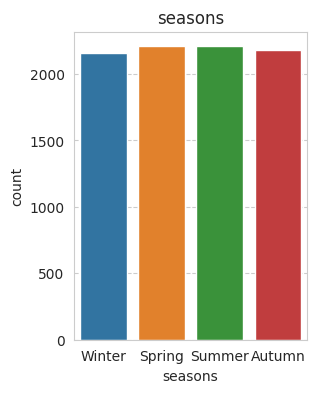

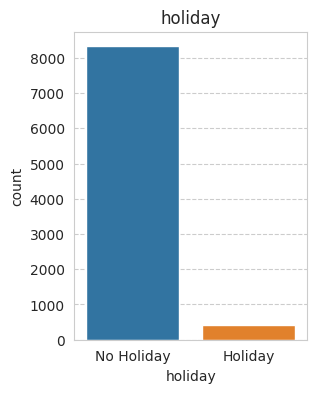

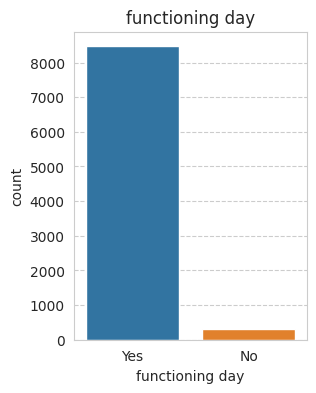

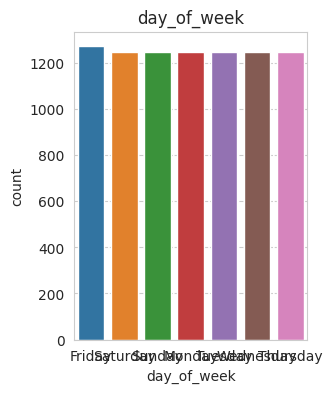

In [28]:
# Chart - 5 visualization code
# Count plot for the categorical features

for col in categorical_var:
  plt.figure(figsize=(3,4))
  sns.countplot(data=bike_df,x=col)
  plt.title(col)
  plt.show()

##### 1. Why did you pick the specific chart?

* Bar charts are useful to compare different categorical or discrete variables

##### 2. What is/are the insight(s) found from the chart?

* We can say that this columns will not have a greater impact.
* There are very less count of Holiday and No functioning day. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help creating a positive business impact

## **Bivariate Analysis**

## Numerical variabels vs rented bike count

#### Chart - 6

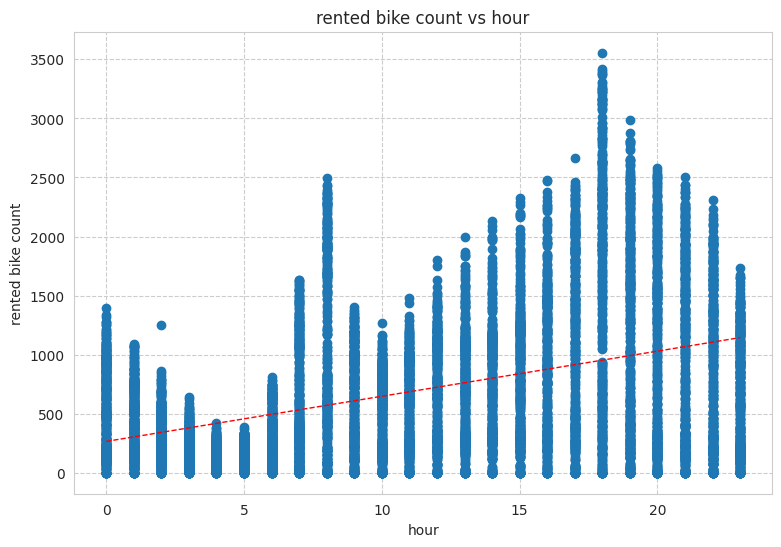

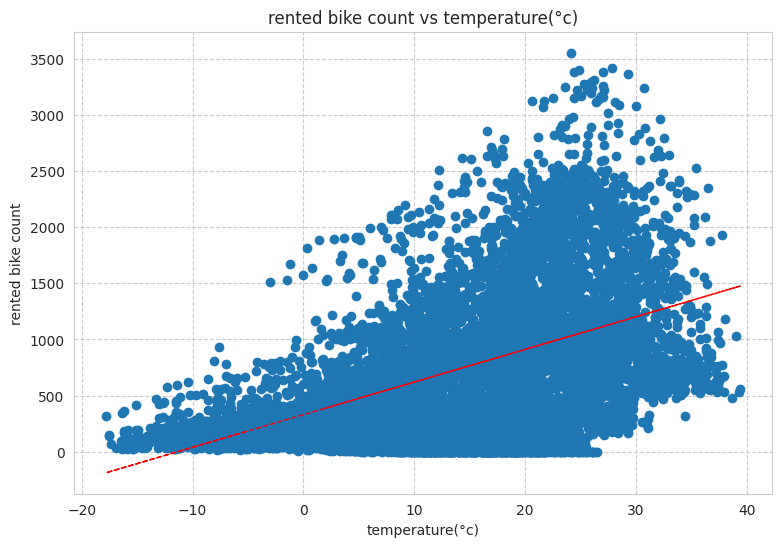

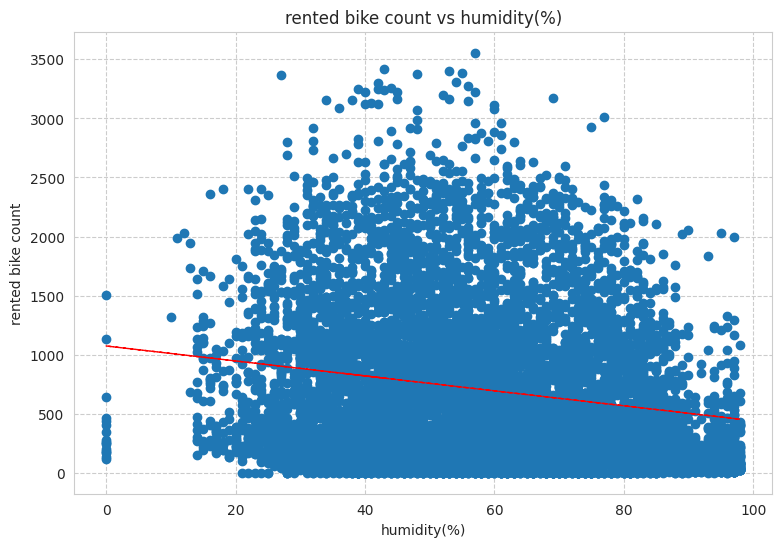

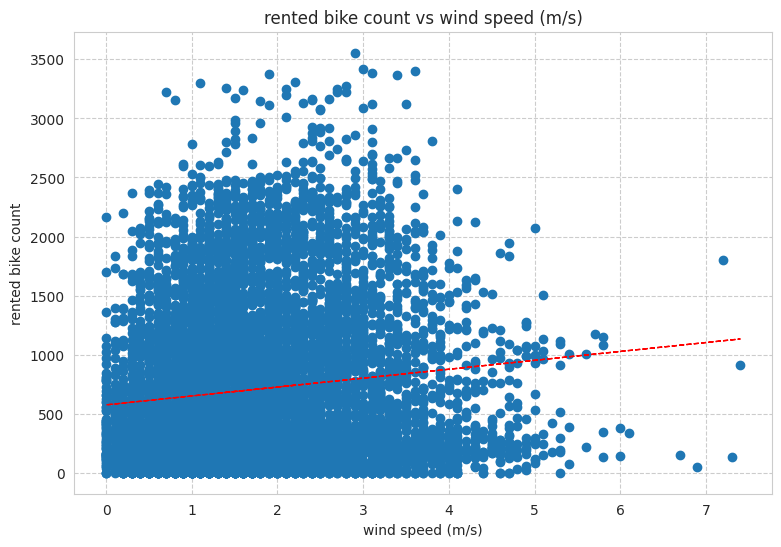

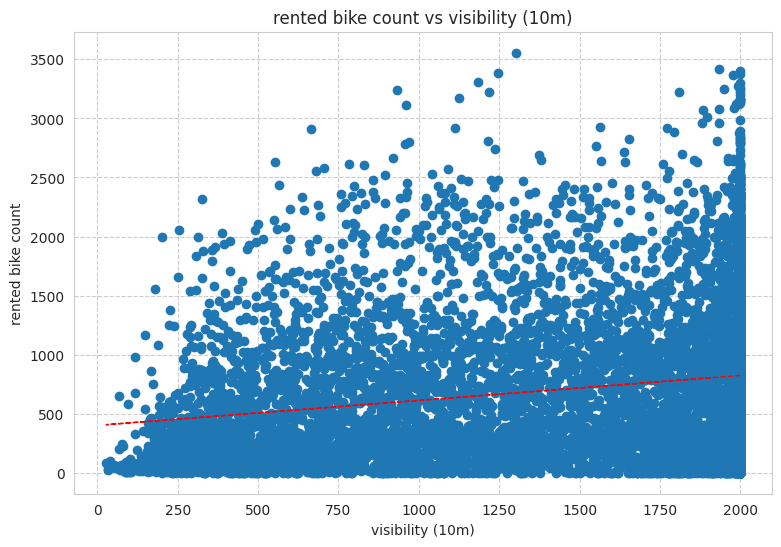

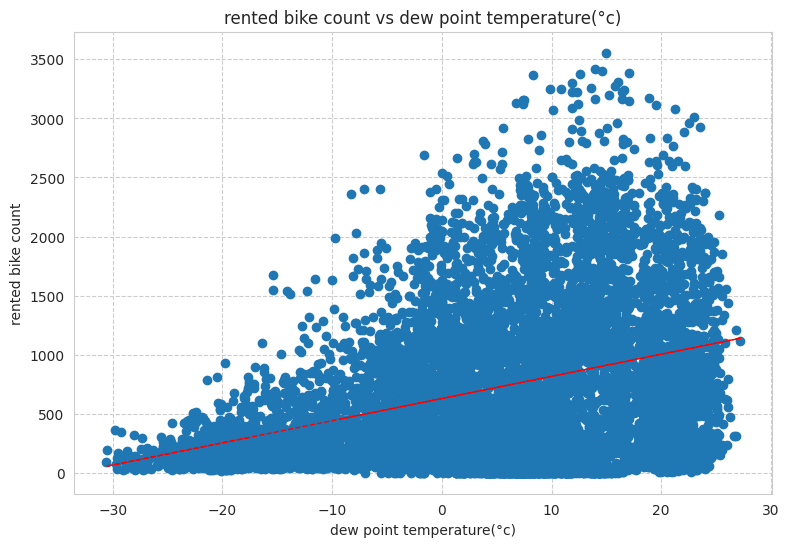

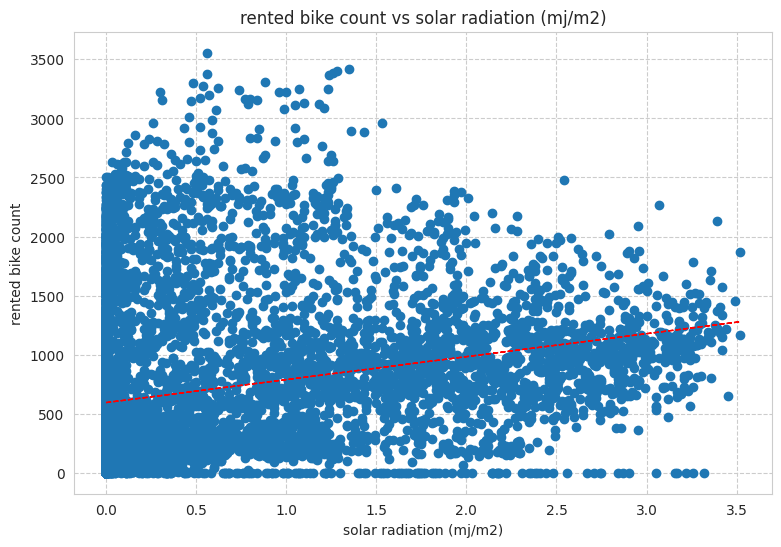

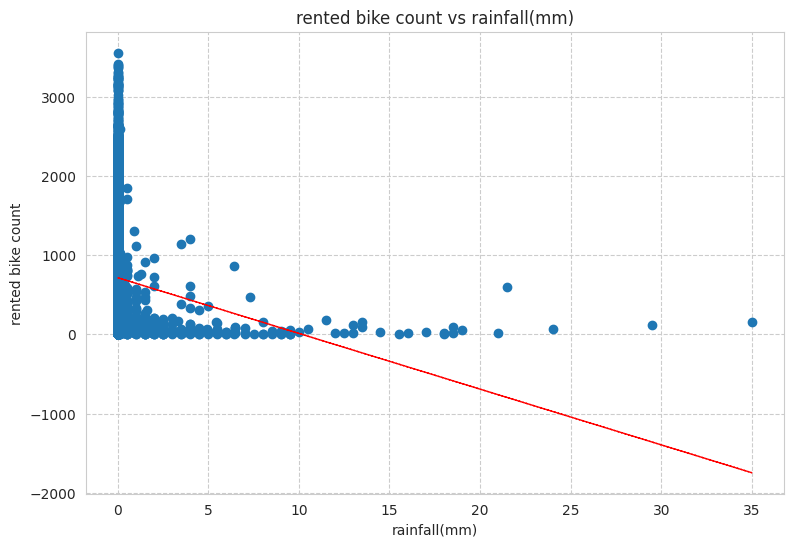

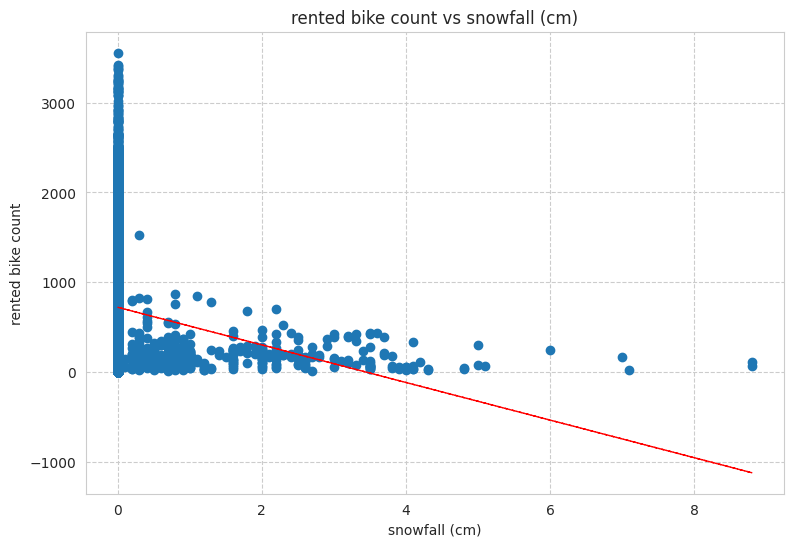

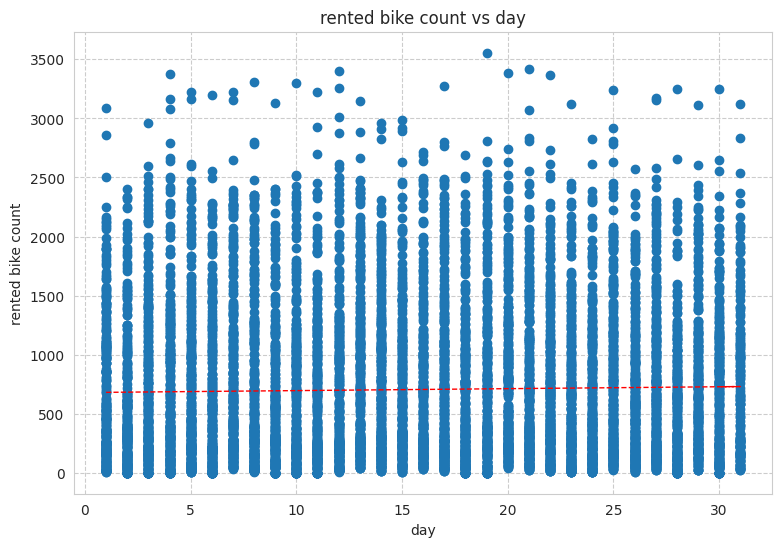

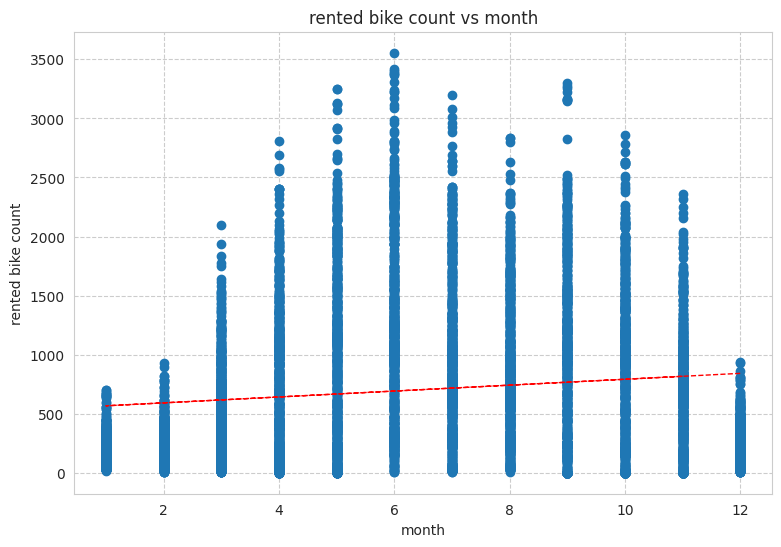

In [29]:
# Chart - 6 visualization code
# Scatter-plot of numerical_ver vs rented bike count

for col in numerical_var:
  fig = plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature = bike_df[col]
  label = bike_df['rented bike count']
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('rented bike count')
  ax.set_title('rented bike count vs ' + col)

  z=np.polyfit(bike_df[col],bike_df['rented bike count'], 1)
  y_hat = np.poly1d(z)(bike_df[col])

  plt.plot(bike_df[col],y_hat,"r--",lw=1)

plt.show()  

##### 1. Why did you pick the specific chart?

Scatter plots shows how much one variable is affected by another or the relationship between them with the help of dots in two dimension

##### 2. What is/are the insight(s) found from the chart?

* From above we can conclude that the independent variable **rented bike count** is highly correlated with **temperature, humidity, windspeed, visibility, dew point temperature, rainfall and snowfall.** 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

above highly correlated features are impacting negatively on business.

#### Chart - 7

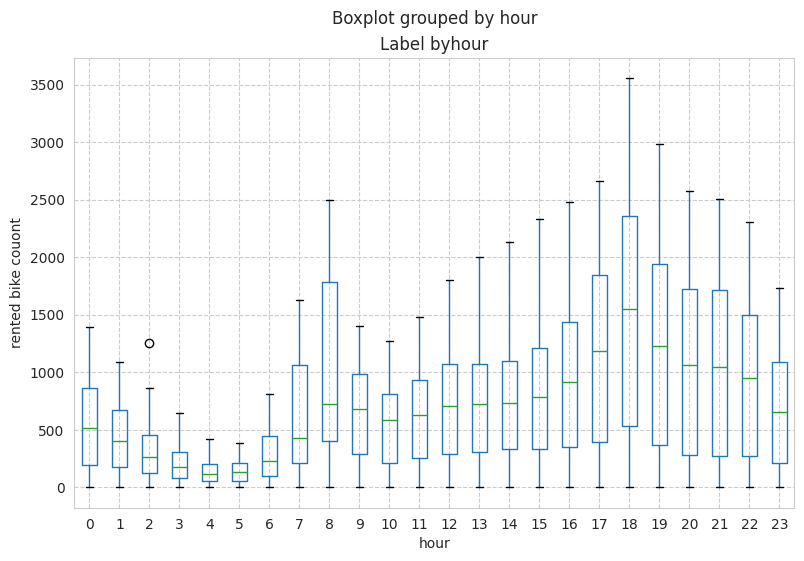

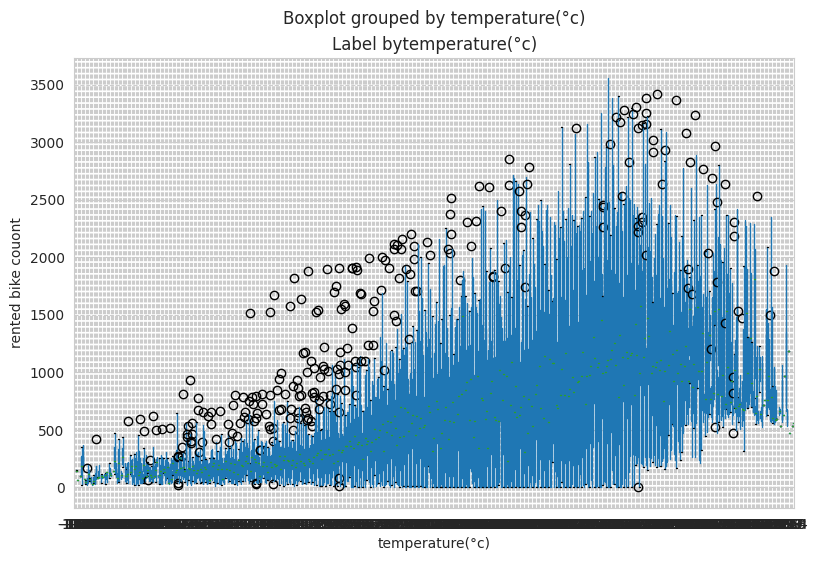

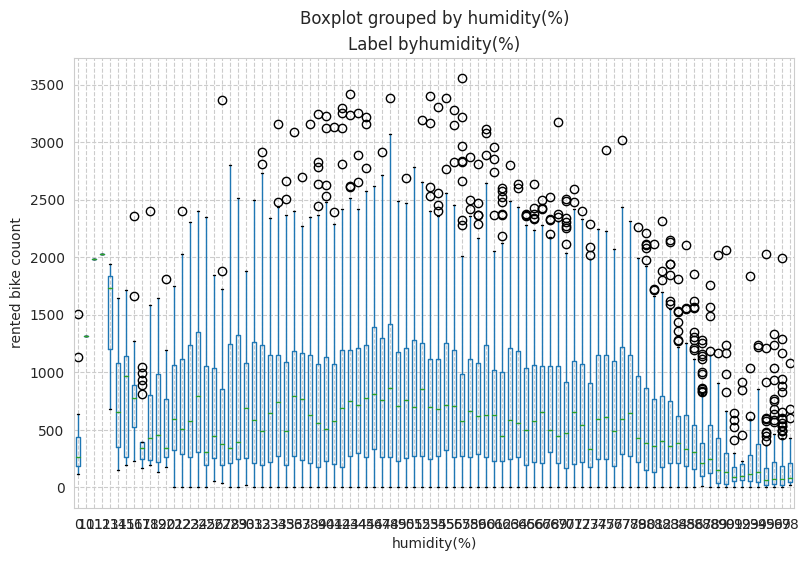

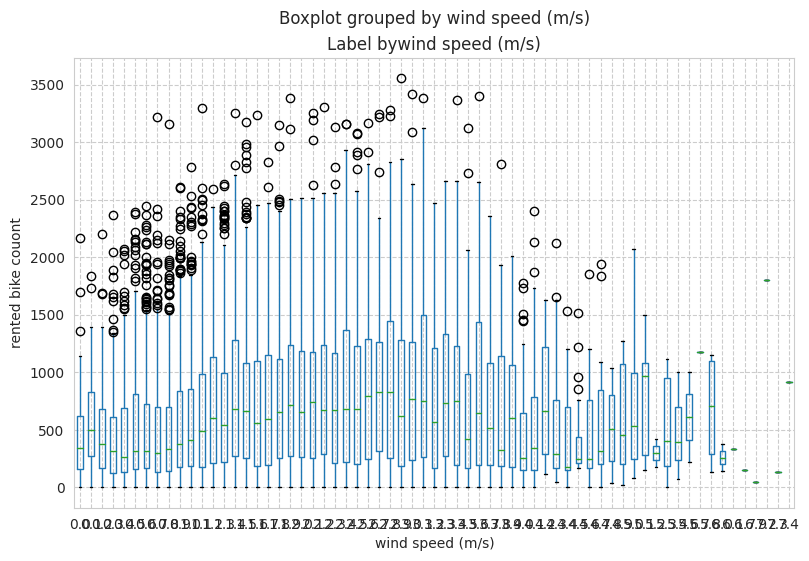

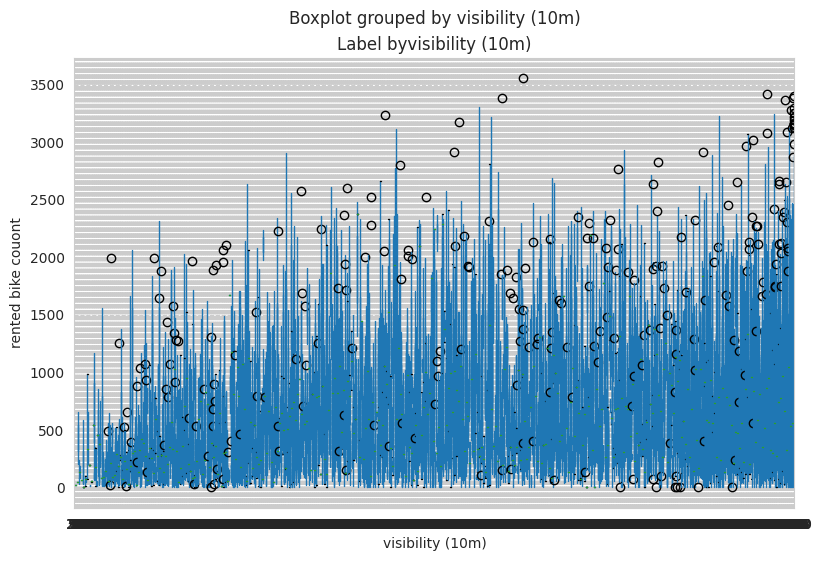

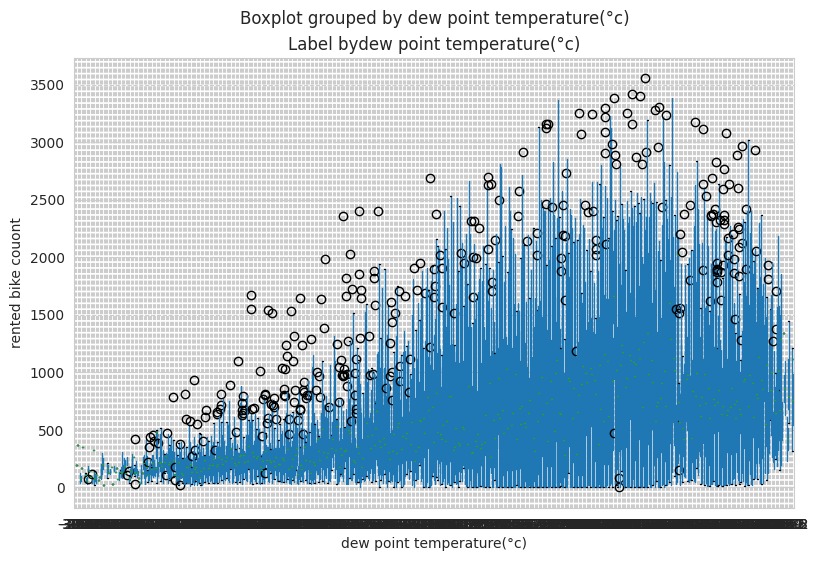

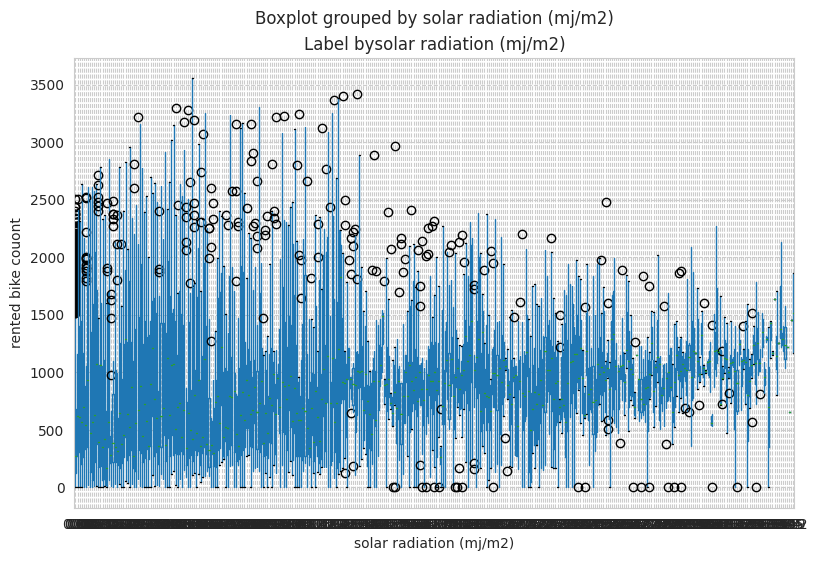

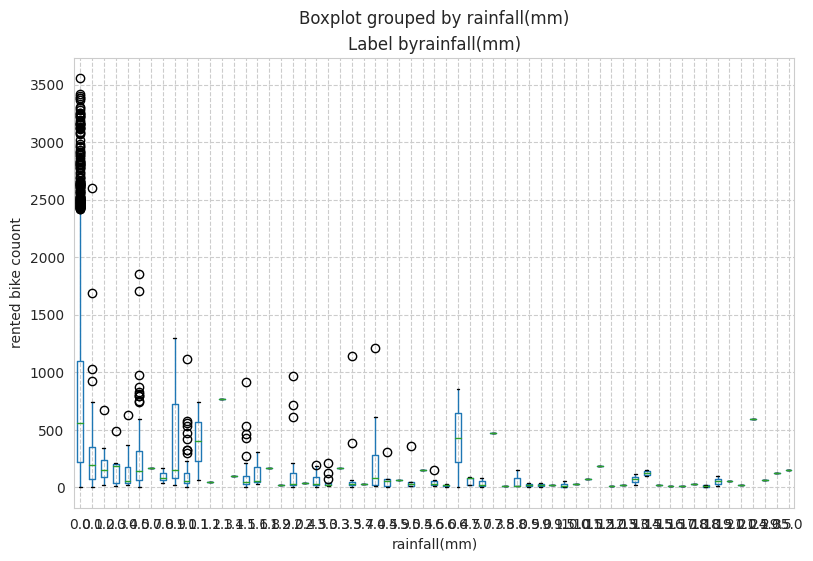

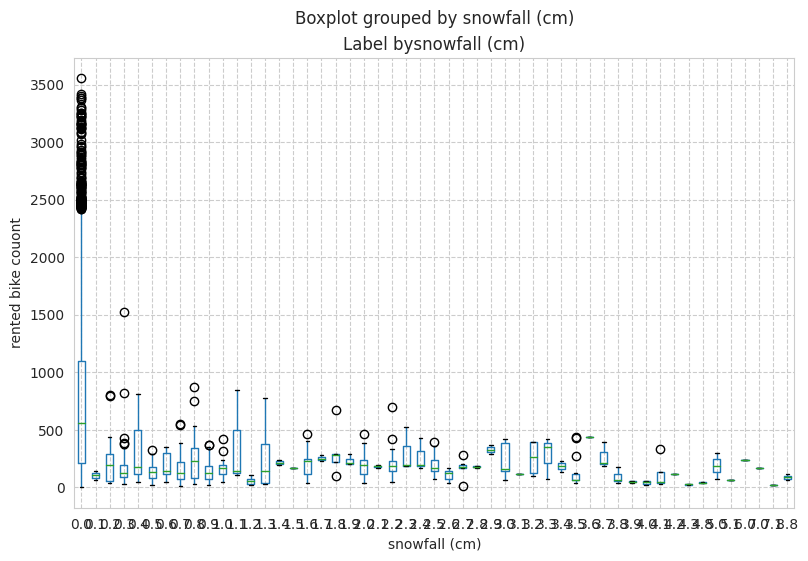

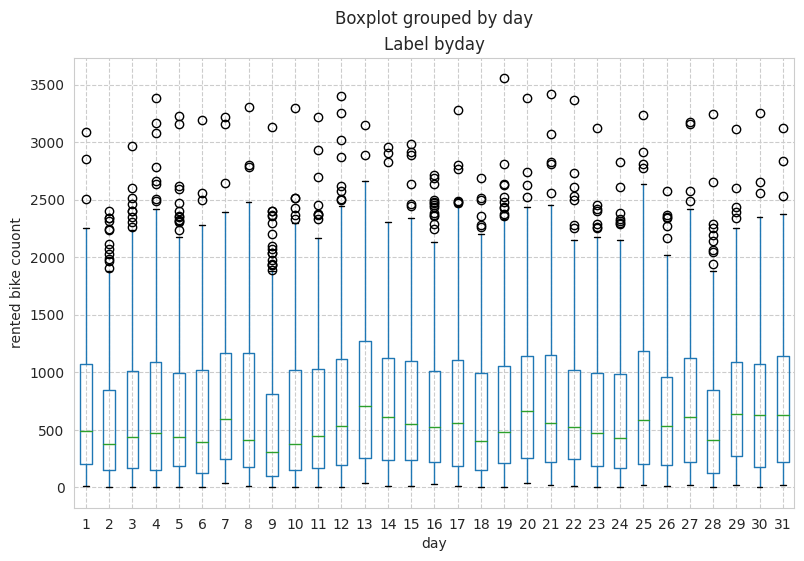

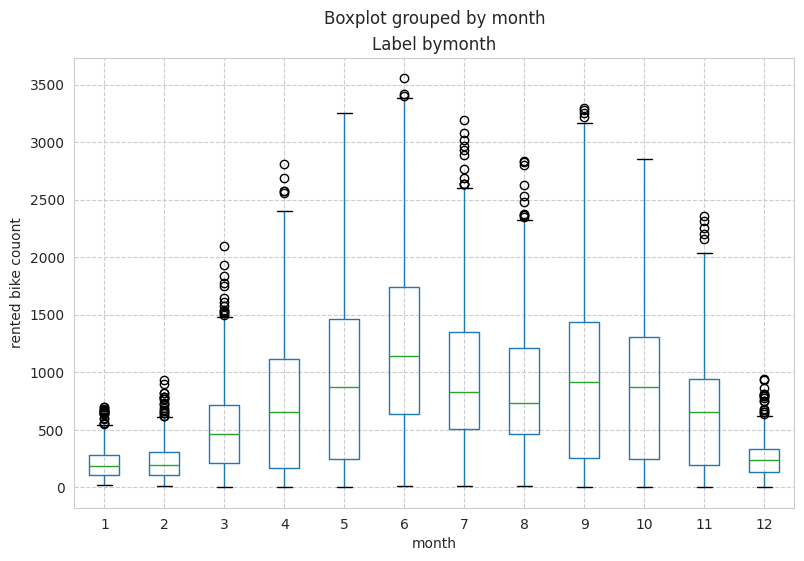

In [30]:
# Chart - 7 visualization code
# Boxplot of numerical_ver vs rented bike count

for col in numerical_var:
  fig = plt.figure(figsize=(9,6))
  ax=fig.gca()
  bike_df.boxplot(column='rented bike count',by=col,ax=ax)
  ax.set_title('Label by' + col)
  ax.set_ylabel("rented bike couont")
plt.show()  

#### Chart - 8

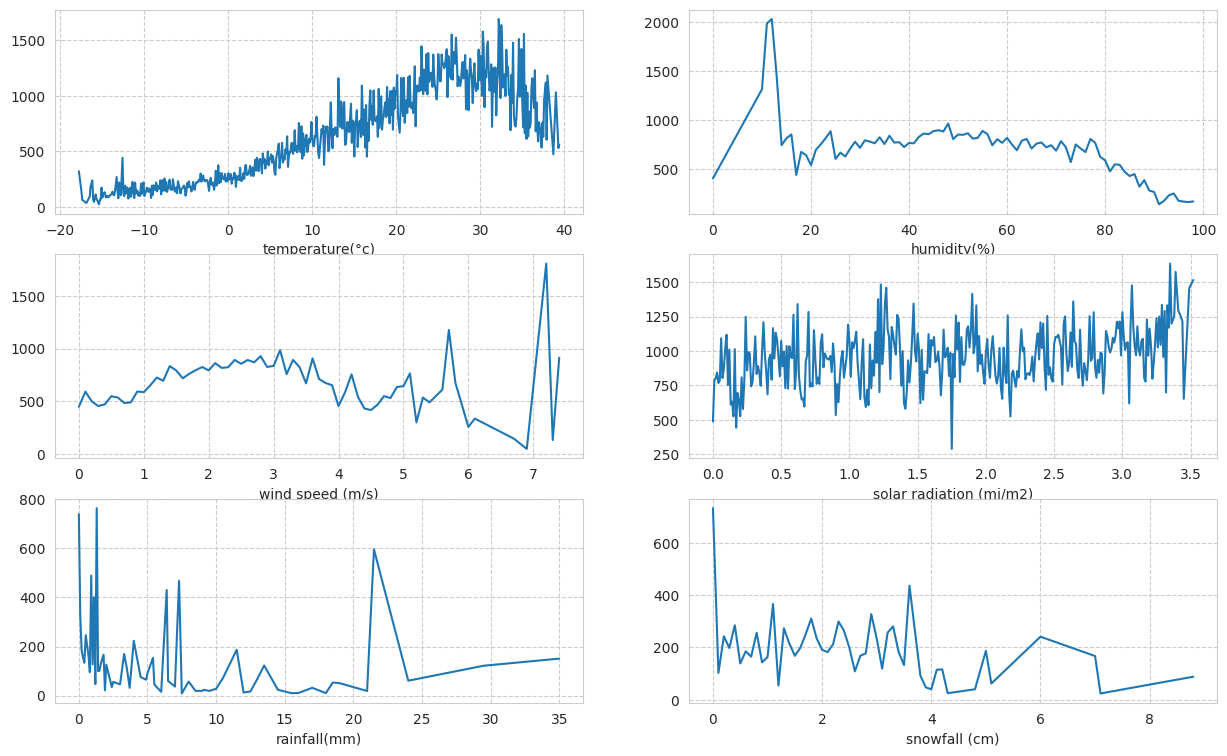

In [31]:
# Chart - 8 visualization code
# Lineplot numerical_var vs rented bike count

fig,ax=plt.subplots(3,2,figsize=(15,9))

bike_df.groupby('temperature(°c)').mean()['rented bike count'].plot(ax=ax[0][0])

bike_df.groupby('humidity(%)').mean()['rented bike count'].plot(ax=ax[0][1])

bike_df.groupby('wind speed (m/s)').mean()['rented bike count'].plot(ax=ax[1][0])

bike_df.groupby('solar radiation (mj/m2)').mean()['rented bike count'].plot(ax=ax[1][1])

bike_df.groupby('rainfall(mm)').mean()['rented bike count'].plot(ax=ax[2][0])

bike_df.groupby('snowfall (cm)').mean()['rented bike count'].plot(ax=ax[2][1])

plt.show()

##### 1. Why did you pick the specific chart?

* we use line plot to see the trend of numerical variables with respect to the rented bike count.
* means to see the count of rented bikes affected by the temperature, humidity, solar radiations, rainfaal, wind-speed and snowfall.

##### 2. What is/are the insight(s) found from the chart?

* When the temperature is more the rental bike count is also high. 
* With increase in humidity the demand of rental bikes decreases. 
* Wind speed and solar radiation do not have much impact on the bike count. 
* When there is more than 10mm rainfall the demand of bike decreases but above 20mm of rain there is a huge peak. This could be the outlier or rainfall in the Summer.
* With increase in snowfall there is a decrease in rented bike count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help creating a positive business impact.

#### Chart - 9

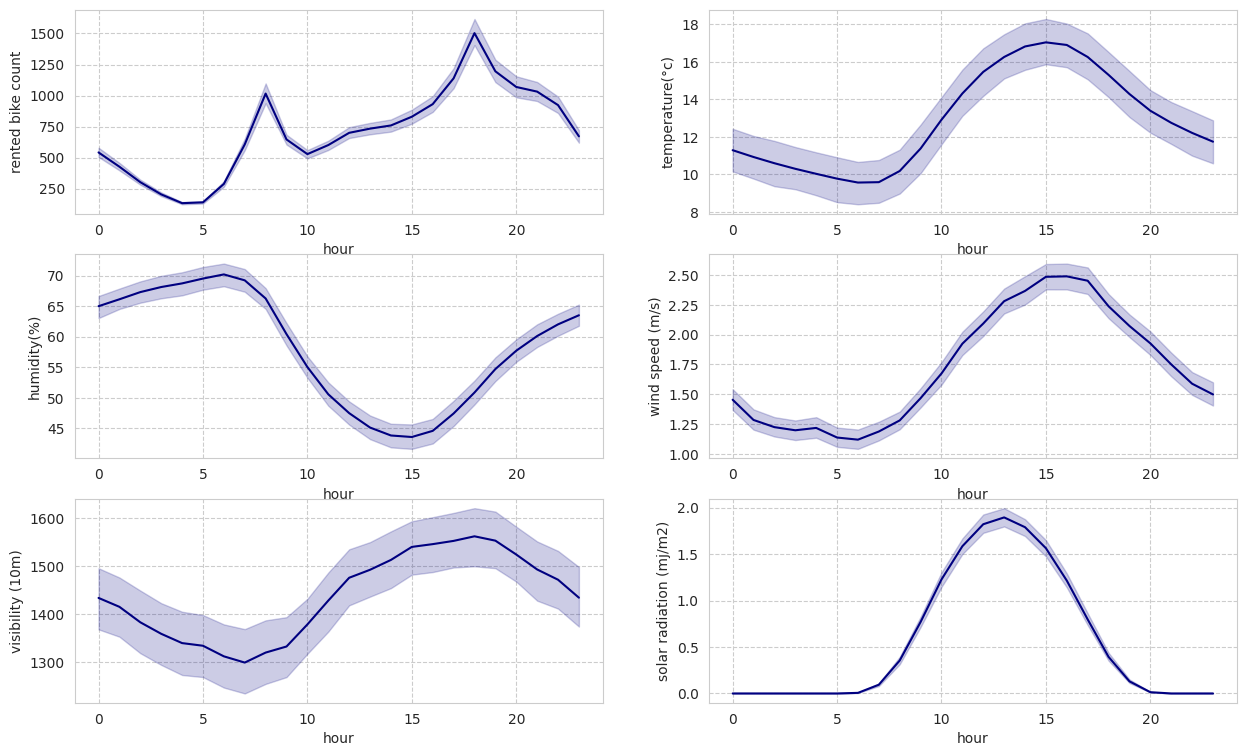

In [32]:
# Chart - 9 visualization code
# Spread of numerical variables across hours

fig, ax = plt.subplots(3,2,figsize=(15,9))

sns.lineplot(x='hour', y='rented bike count', data=bike_df, color='Navy', ax=ax[0][0])

sns.lineplot(x='hour', y='temperature(°c)', data=bike_df, color='Navy', ax=ax[0][1])

sns.lineplot(x='hour', y='humidity(%)', data=bike_df, color='Navy', ax=ax[1][0])

sns.lineplot(x='hour', y='wind speed (m/s)', data=bike_df, color='Navy', ax=ax[1][1])

sns.lineplot(x='hour', y='visibility (10m)', data=bike_df, color='Navy', ax=ax[2][0])

sns.lineplot(x='hour', y='solar radiation (mj/m2)', data=bike_df, color='Navy', ax=ax[2][1])

plt.show()

##### 1. Why did you pick the specific chart?

Line plot shows the continuous trend of the data, how it is performing with respect to time 


##### 2. What is/are the insight(s) found from the chart?

* At the beginning of the day the demand of rental bike increases with the highest peak in the evening and later decreasing.
* The demand of rental bike is at peak at 8am and 6pm so we can say that demand is more during office opening and closing time.
* Temperature, wind speed, solar radiation also increases and are at the peak in afternoon.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, the gained insights help creating a positive business impact. 
* as the bike sharing system is based on hourly pattern, so this graph helps us understand how the dependent varible or demand of bikes frequetly changes with respect to hour

#### Chart - 10

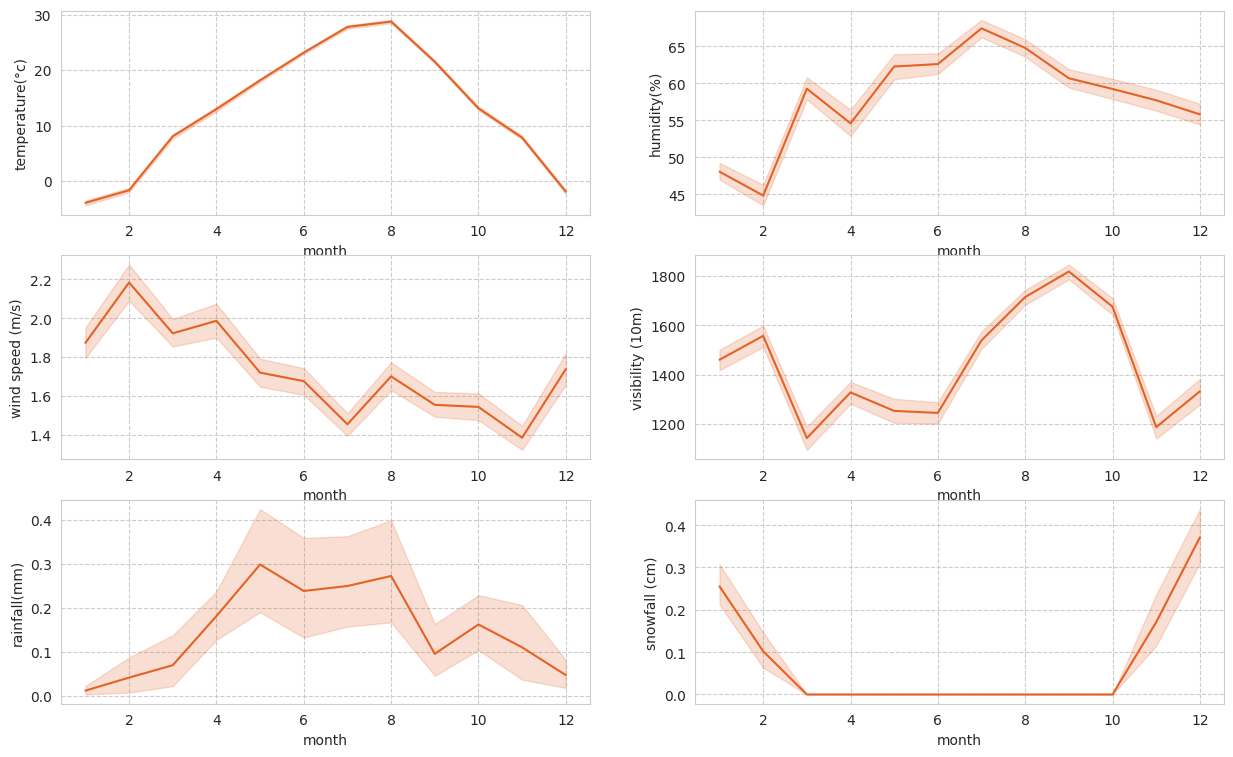

In [33]:
# Chart - 10 visualization code
# Spread of numerical_var accorss months

fig, ax = plt.subplots(3,2,figsize=(15,9))

sns.lineplot(x='month', y='temperature(°c)', data=bike_df, color='#E56124', ax=ax[0][0])

sns.lineplot(x='month', y='humidity(%)', data=bike_df, color='#E56124', ax=ax[0][1])

sns.lineplot(x='month', y='wind speed (m/s)', data=bike_df, color='#E56124', ax=ax[1][0])

sns.lineplot(x='month', y='visibility (10m)', data=bike_df, color='#E56124', ax=ax[1][1])

sns.lineplot(x='month', y='rainfall(mm)', data=bike_df, color='#E56124', ax=ax[2][0])

sns.lineplot(x='month', y='snowfall (cm)', data=bike_df, color='#E56124', ax=ax[2][1])

plt.show()


##### 1. Why did you pick the specific chart?

Line plot shows the continuous trend of the data, how it is performing with respect to time 

##### 2. What is/are the insight(s) found from the chart?

Above all six plots showing the monthwise geographical trend for the 1 year 
* 1) temperature vs Month - Temperature is maximum in between 6 to 8 months
* 2 humidity vs month - humidty is maximum where the rise in temperaute and case of rainfall
* 3) windspeed vs months - windspeed is maximum in 1 to 4 month 
* 4) Visibility vc month - visibility is maximum in summer and minimum from 1 to 5 month
* 5) rainfall vs month - rainfall is maximum in mansoon
* 6) snowfall vs month - snaowfall is maximum in winter

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Above plot helps gained positive impact on business , because the bike sharing demand is also depends on some geographical conditions

#### Chart - 11

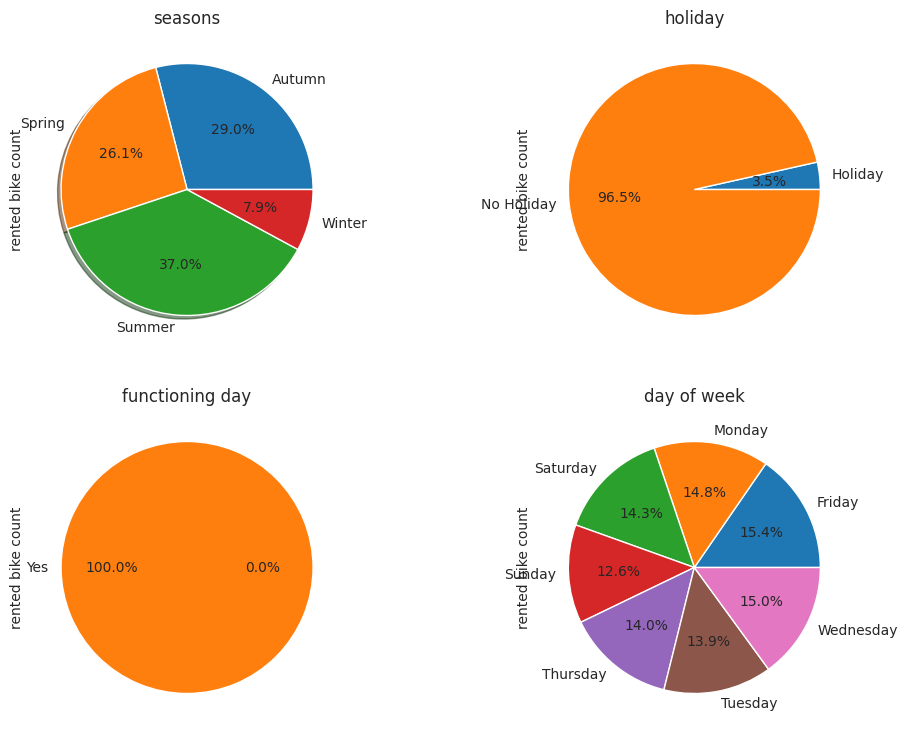

In [34]:
# Chart - 11 visualization code
# Pie chart Categorical_var vs rented bike count

fig, ax = plt.subplots(2,2,figsize=(12,9))

bike_df.groupby('seasons').sum()['rented bike count'].plot.pie(autopct='%1.1f%%', shadow=True,ax= ax[0][0])
ax[0][0].set_title("seasons")

bike_df.groupby('holiday').sum()['rented bike count'].plot.pie(autopct='%1.1f%%',ax= ax[0][1])
ax[0][1].set_title("holiday")

bike_df.groupby('functioning day').sum()['rented bike count'].plot.pie(autopct='%1.1f%%', ax= ax[1][0])
ax[1][0].set_title("functioning day")

bike_df.groupby('day_of_week').sum()['rented bike count'].plot.pie(autopct='%1.1f%%', ax= ax[1][1])
ax[1][1].set_title("day of week")

plt.show()

##### 1. Why did you pick the specific chart?


* Pie chart are shown as a percentage of the whole pie.
* It shows the proportion.

##### 2. What is/are the insight(s) found from the chart?

* Above we can see Autumn, Spring and Summer this three seasons has the highest demand of rented bikes.
* on working days there is approximately 97% demand of the rent bikes beccause we can say that people use this rented bike services in order to go to office, etc works, and we can predict that peoples generally on holdays prefer to stay at home or prefer there own vehicles.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help creating a positive business impact

#### Chart - 12

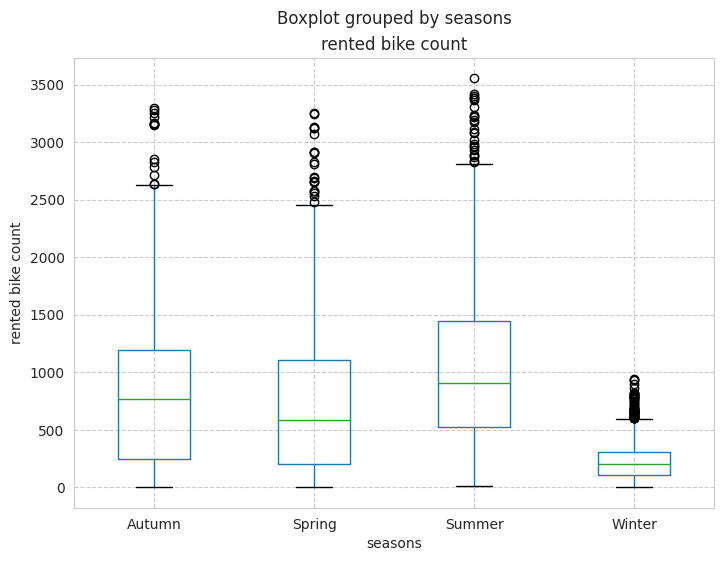

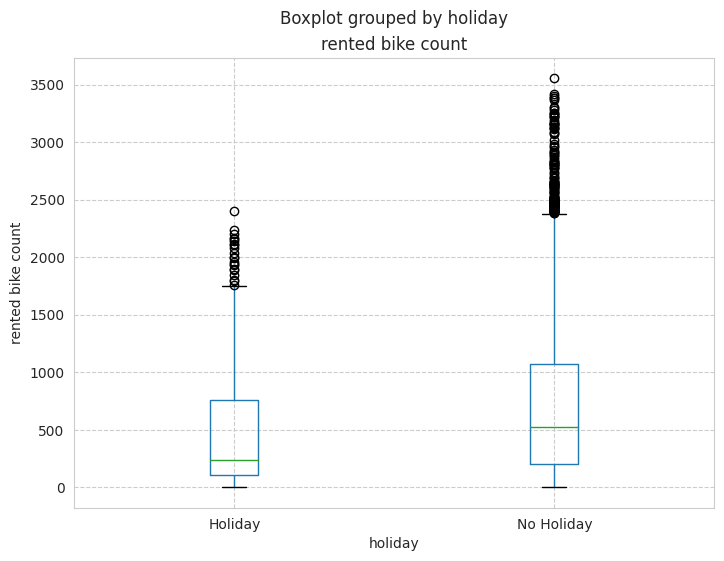

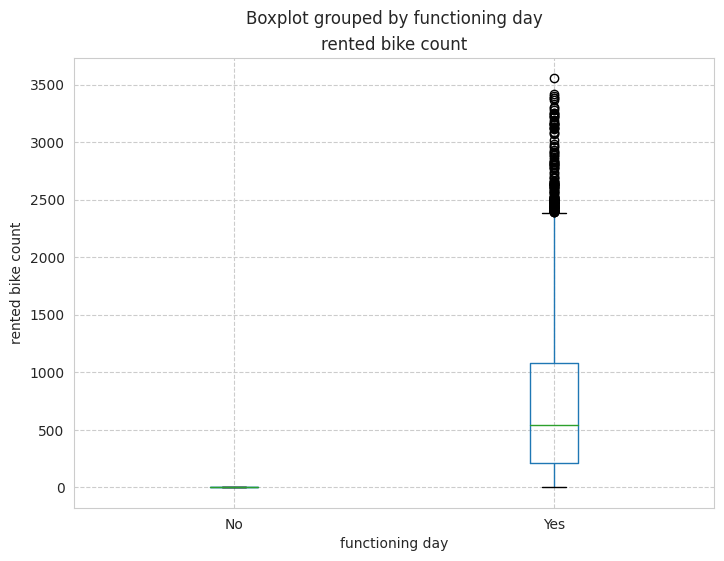

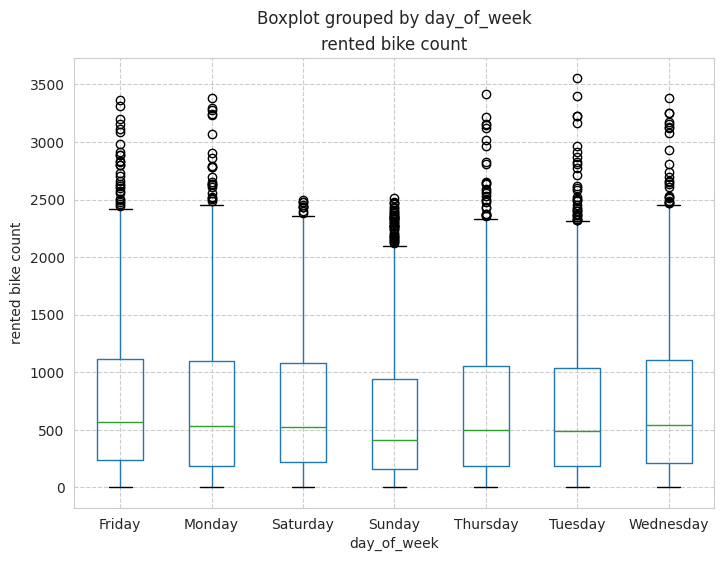

In [35]:
# Chart - 12 visualization code
# Boxplot of categorical_var vs rented bike count

for col in categorical_var:
  fig = plt.figure(figsize=(8,6))
  ax = fig.gca()
  bike_df.boxplot(column= 'rented bike count', by = col, ax = ax)
  ax.set_ylabel("rented bike count")
plt.show()

##### 1. Why did you pick the specific chart?

* Use Boxplot because it helps detect outliers
* determine where the majority of the points land at a glance

##### 2. What is/are the insight(s) found from the chart?

* In Summer the demand of rented bike is high because temperature and solar radiation is high in summer. 
* We have seen there are less holidays so obviously rented bike count is also less on holidays. 
* Almost no demand on non functioning day.
* The demand of rental bikes slightly decreases on weekend days i.e saturday and sunday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


yes, the gained insights help creating a positive business impact

#### Chart - 13

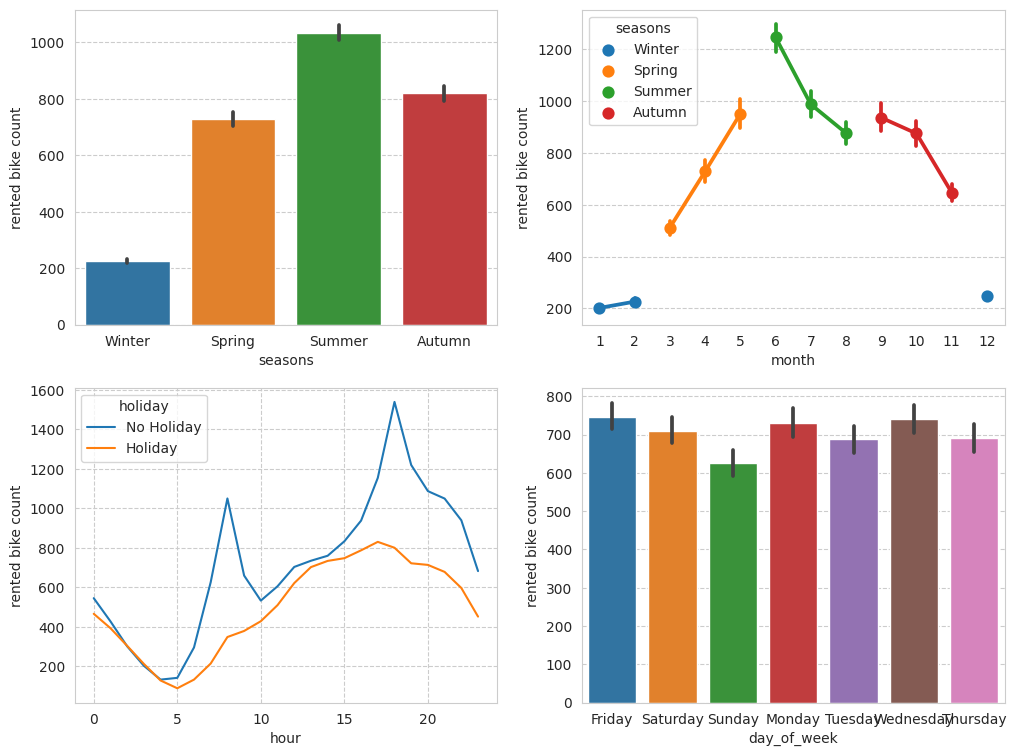

In [36]:
# Chart - 13 visualization code
# spread of rented bike count across categorical_var
fig, ax = plt.subplots(2,2,figsize=(12,9))

sns.barplot(x= 'seasons', y= 'rented bike count', data= bike_df, ax= ax[0][0])

sns.pointplot(x= 'month', y= 'rented bike count', hue= 'seasons',
              data= bike_df, ax= ax[0][1])

sns.lineplot(x= 'hour', y= 'rented bike count', hue= 'holiday',
             ci=None, data= bike_df, ax= ax[1][0])

sns.barplot(x= 'day_of_week', y= 'rented bike count', data= bike_df, ax= ax[1][1])

plt.show()

##### 1. Why did you pick the specific chart?

The above plots shows how the dependent variable rented bike count is affecting with respect to Independet variables

##### 2. What is/are the insight(s) found from the chart?

* There is a huge demand for bike rents in summer season while the least bike rents occur in winter.
* We can see there is a high demand for rented bike in the month of June, August and less demand in the month of December, January and February i.e winter season.
* Non holidays have comparatively high demand for rented bikes as compared to holidays. 
* There is a high demand for rented bikes during office days and demand decreases slightly on Sunday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the gained insights help creating a positive business impact.

# **Feature Selection**

## **Correlation**

#### Chart - 14 - Correlation Heatmap

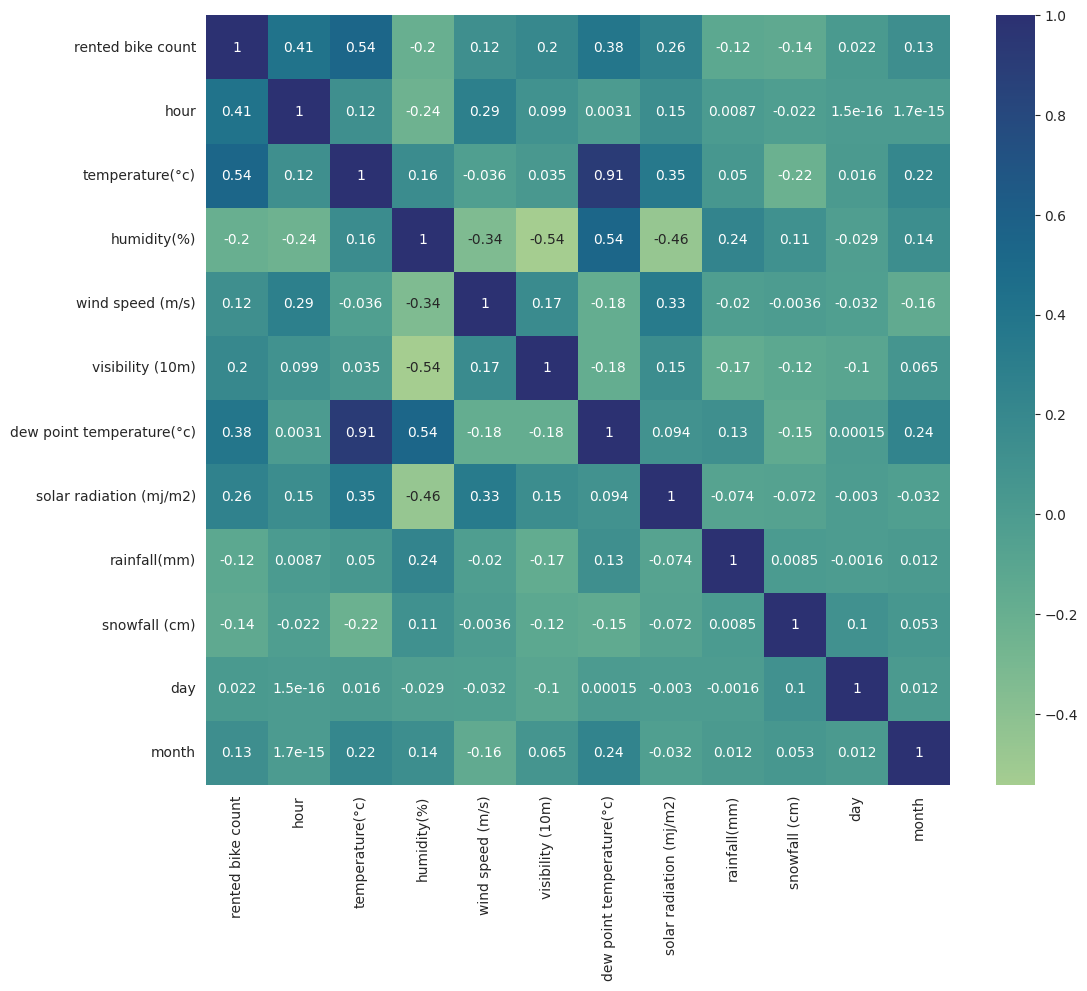

In [37]:
# Correlation Heatmap visualization code
corr_df = bike_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_df, annot =True, cmap ="crest" )
plt.show()

##### 1. Why did you pick the specific chart?

* Correlattion heatmap helps us know how the two variables are related to each-other.

##### 2. What is/are the insight(s) found from the chart?

The most correlated features to the rented bike count are:
* hour
* temperature(°c)
* dew point temperature(°c)
* solar radiation (mj/m2)

There is a high correlation between dew point temperature(°c) and temperature(°c).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


above correlation heatmap insights lead to negative growth because the variables like hour, temperature, dew point temperature and solar radiations are highly corelated, keeping them will negatively impact the predictions as well as business.

# **Detecting Multicollinearity using VIF**


In [38]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [39]:
calc_vif(bike_df[[i for i in numerical_var]])

variables        VIF
0                        hour   4.425960
1             temperature(°c)  38.389623
2                 humidity(%)   8.344305
3            wind speed (m/s)   4.879565
4            visibility (10m)   9.481423
5   dew point temperature(°c)  19.815223
6     solar radiation (mj/m2)   2.900819
7                rainfall(mm)   1.082134
8               snowfall (cm)   1.144168
9                         day   4.292003
10                      month   5.096115

##### 1. Why did you pick the specific chart?

* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

##### 2. What is/are the insight(s) found from the chart?

* We can see here that 'dew point temperature(°c)', 'temperature(°c)' have a high VIF value, meaning they can be predicted by other independent variables in the dataset. These two variables are highly correlated.

* Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help creating a positive business impact.

In [40]:
# droping 'dew point temperature(°c)', 'day', 'month'

calc_vif(bike_df[[ i for i in numerical_var if i not in ['dew point temperature(°c)', 'day', 'month']]])

variables       VIF
0                     hour  3.921832
1          temperature(°c)  3.228318
2              humidity(%)  4.868221
3         wind speed (m/s)  4.608625
4         visibility (10m)  4.710170
5  solar radiation (mj/m2)  2.246791
6             rainfall(mm)  1.079158
7            snowfall (cm)  1.120579

* After droping 'dew point temperature(°c)', 'day' and 'month', VIF values for all features have decreased less than 5 that is good to build regression model.

In [41]:
# droping 'dew point temperature(°c)', 'day', 'month' from original dataset
data= bike_df.drop(['dew point temperature(°c)', 'day', 'month'], axis=1)

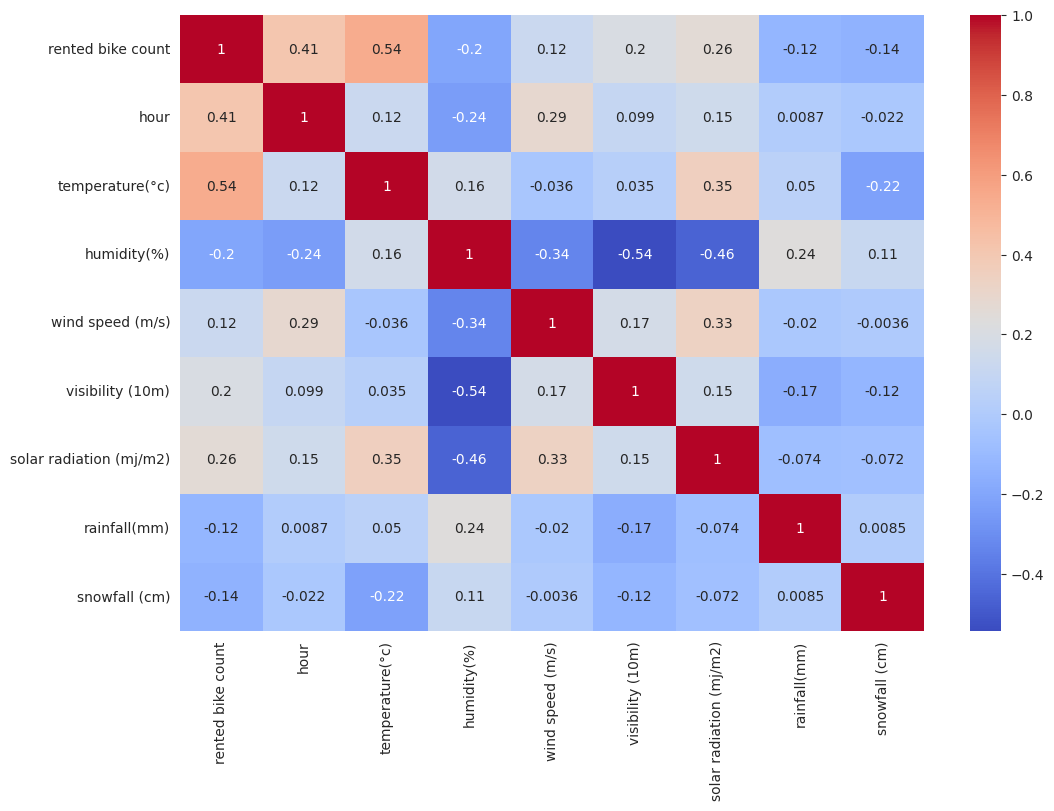

In [42]:
# Correlation Heatmap after reducing the multicollinearity
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [43]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**H0 : β1= β2 = … = βn = 0**

**H1 : βi ≠ 0**

#### 2. Perform an appropriate statistical test.

In [44]:
# importing module to perform F-test
import statsmodels.api as sm

# prepare the independent and dependent variable
X = data.iloc[:,1:]
y = np.sqrt(data.iloc[:,0])

# Fit a multiple linear regression model
model = sm.OLS(y,X).fit() 

# Perform an F-test for all predictors
result = model.f_test(np.identity(X.shape[1]))

# Print the F-value and corresponding p-value
print("F-value:", result.fvalue)
print("p-value:", result.pvalue,'\n')

print(result.summary())

ValueError: ignored

* We get an F-critical value of 1.75 from F distribution table which is much  lower than our F-statistic score of 8739.81. 
*Since, F-statistic > F-critical, we reject the null hypothesis, which means that the independent variables are jointly significant in explaining the variance of the dependent variable.


##### Which statistical test have you done to obtain P-Value?

In the above I performed **Anova Test** 

##### Why did you choose the specific statistical test?

**ANOVA (Analysis of Variance)**: used to compare the means of more than two groups

* An F-test is used to test the overall significance of the multiple regression model, by comparing the ratio of explained variance to unexplained variance to a theoretical F-distribution.

* In this, we can check the p-value in the summary to determine whether to reject or accept the null hypothesis. Here the p-value is the probability that the null hypothesis for the full model is true (i.e., that all of the regression coefficients are zero). Since the p-value is approximately zero, we reject the null hypothesis. In other words, there is evidence that suggests that there is a linear relationship between **rented bike count**  and the set of **Independent variables**.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**H0: The coefficient of the independent variable is equal to zero. This means that the independent variable has no relationship with the dependent variable**

**Ha: The coefficient of the independent variable is not equal to zero. This means that the independent variable has a relationship with the dependent variable.**

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Prepare the independent and dependent variables
X = data.iloc[:,1:]
y = np.sqrt(data.iloc[:,0])

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Obtain the t-values and p-values
t_values = model.tvalues
p_values = model.pvalues

print(model.summary(),'\n')

# Obtain the t-values and p-values
for i, (t_values, p_values) in enumerate(zip(t_values, p_values)):
    print(f" t-values ={t_values:.2f}, p-value={p_values:.3f}") 

##### Which statistical test have you done to obtain P-Value?

* Above I have performed the t test ,In a multiple linear regression model, a t-test is used to test the significance of each independent variable in explaining the variation in the dependent variable. 

##### Why did you choose the specific statistical test?

* From Above we can conclude that almost all the independent variable has small p-value (e.g., less than 0.05) indicates strong evidence against the null hypothesis and suggests that the corresponding variable is significantly related to the dependent variable
* the magnitude of the t-values, for the variables **hour, temperature(°c),  holiday and functioning day** has values greater than 2, which indicates the strength of the relationship between the these variables with independent variable is strong. 

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
data.isna().sum()

### 2. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***